# **Real Waste Dataset**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import numpy as np
import zipfile
import random
import shutil
import os

In [2]:
main_dataset_dir = "realwaste-dataset/RealWaste"

# Check if the dataset has been successfully extracted
os.listdir(main_dataset_dir)

['Cardboard',
 'Food Organics',
 'Glass',
 'Metal',
 'Miscellaneous Trash',
 'Paper',
 'Plastic',
 'Textile Trash',
 'Vegetation']

Cardboard - 461
Food Organics - 411
Glass - 420
Metal - 790
Miscellaneous Trash - 495
Paper - 500
Plastic - 921
Textile Trash - 318
Vegetation - 436


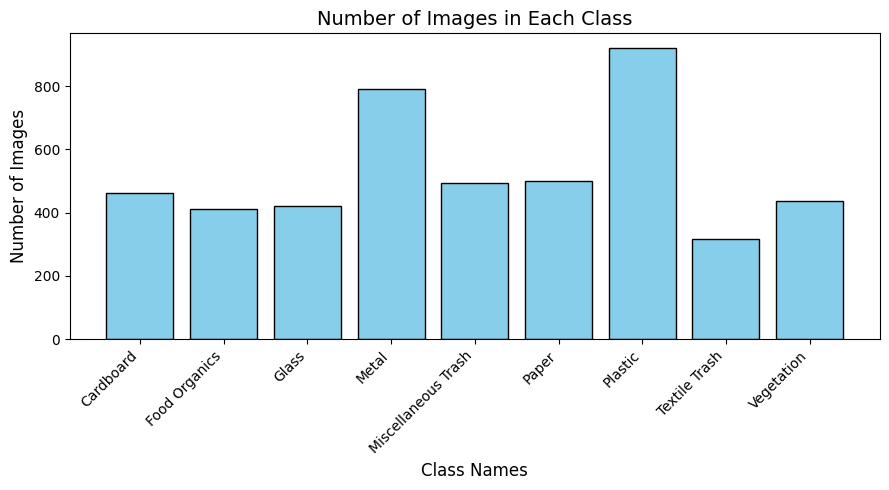

In [3]:
# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir(main_dataset_dir):
    class_path = os.path.join(main_dataset_dir, class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Extracting class names and counts
classes = list(class_image_counts.keys())
counts = list(class_image_counts.values())

for i in range(len(classes)):
    print(classes[i], "-", counts[i])

# Plotting the bar graph
plt.figure(figsize=(9,5))
plt.bar(classes, counts, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel("Class Names", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Number of Images in Each Class", fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()


In [4]:
# Define directories
unzipped_dir = "realwaste-dataset/RealWaste"
balanced_dir = "balanced-dataset"

# ###----------Do not run-------------###

# # Target size for all classes (mean image count)
# target_size = 461

# # Ensure the balanced directory exists
# os.makedirs(balanced_dir, exist_ok=True)

# # Data augmentation setup
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Dictionary to store the count of images in each class
# class_image_counts = {
#     class_folder: len(os.listdir(os.path.join(unzipped_dir, class_folder)))
#     for class_folder in os.listdir(unzipped_dir)
#     if os.path.isdir(os.path.join(unzipped_dir, class_folder))
# }

# # Balancing the dataset
# for class_folder, num_images in class_image_counts.items():
#     class_path = os.path.join(unzipped_dir, class_folder)
#     balanced_class_path = os.path.join(balanced_dir, class_folder)
#     os.makedirs(balanced_class_path, exist_ok=True)

#     image_files = os.listdir(class_path)

#     # For undersampling classes with more than target size
#     if num_images > target_size:
#         print(f"Undersampling {class_folder}: Reducing {num_images} to {target_size} images.")
#         sampled_files = random.sample(image_files, target_size)
#         for img_file in sampled_files:
#             shutil.copy(os.path.join(class_path, img_file), balanced_class_path)
#     else:
#         # For classes with fewer images than target size, augment images
#         sampled_files = image_files  # Copy existing images
#         for img_file in sampled_files:
#             shutil.copy(os.path.join(class_path, img_file), balanced_class_path)

#         # Augment underrepresented classes
#         num_to_generate = target_size - num_images
#         print(f"Augmenting {class_folder}: Generating {num_to_generate} images.")
#         random.shuffle(image_files)  # Shuffle to get different images each time

#         generated_count = 0
#         image_idx = 0  # Index to keep track of images

#         while generated_count < num_to_generate:
#             img_file = image_files[image_idx % len(image_files)]  # Move to next image
#             img_path = os.path.join(class_path, img_file)
#             img = tf.keras.preprocessing.image.load_img(img_path)
#             img_array = tf.keras.preprocessing.image.img_to_array(img)
#             img_array = img_array.reshape((1,) + img_array.shape)

#             # Generate only one augmented image per image
#             for batch in datagen.flow(
#                 img_array, batch_size=1, save_to_dir=balanced_class_path,
#                 save_prefix='aug', save_format='jpeg'
#             ):
#                 generated_count += 1
#                 if generated_count >= num_to_generate:
#                     break

#             # Move to next image for augmentation
#             image_idx += 1

# # Verify the results
# for class_folder in os.listdir(balanced_dir):
#     class_path = os.path.join(balanced_dir, class_folder)
#     num_balanced_images = len(os.listdir(class_path))
#     print(f"Class: {class_folder}, Balanced Images: {num_balanced_images}")


In [5]:
for class_folder in os.listdir(balanced_dir):
    print(f"Class: {class_folder}, Images: {len(os.listdir(os.path.join(balanced_dir, class_folder)))}")

Class: Cardboard, Images: 461
Class: Food Organics, Images: 461
Class: Glass, Images: 461
Class: Metal, Images: 461
Class: Miscellaneous Trash, Images: 461
Class: Paper, Images: 461
Class: Plastic, Images: 461
Class: Textile Trash, Images: 461
Class: Vegetation, Images: 461


In [6]:
# ###----------Do not run-------------###

# # Set paths
# dataset_dir = "balanced-dataset"
# classes = os.listdir(dataset_dir)

# # Create directories for train, val, and test splits
# base_dir = 'splitted_balanced_dataset'
# os.makedirs(base_dir, exist_ok=True)

# train_dir = os.path.join(base_dir, 'train')
# val_dir = os.path.join(base_dir, 'val')
# test_dir = os.path.join(base_dir, 'test')

# # Create folders for each class in train, val, and test directories
# for class_name in classes:
#     os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#     os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# # Split the dataset for each class
# for class_name in classes:
#     class_path = os.path.join(dataset_dir, class_name)
#     images = os.listdir(class_path)
#     np.random.shuffle(images)

#     # Split images into 60% train, 20% validation, 20% test
#     train_images, test_images = train_test_split(images, test_size=0.4, random_state=42)
#     val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

#     # Move images to the respective directories
#     for img in train_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

#     for img in val_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

#     for img in test_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# print("Dataset split completed!")

In [7]:
base_dir = 'splitted_balanced_dataset'

In [8]:
# ###----------Do not run-------------###

# def check_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 with Image.open(file_path) as img:
#                     img.verify()  # Check if it's a valid image
#             except (IOError, SyntaxError):
#                 print(f"Invalid file: {file_path}")
#                 os.remove(file_path)  # Remove problematic files

# # Check both training and validation directories
# check_images(base_dir + "/train")
# check_images(base_dir + "/val")

In [9]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [10]:
train_dataset = train.flow_from_directory(base_dir+"/train",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='sparse')

validation_dataset = validation.flow_from_directory(base_dir+"/val",
                                          target_size=(150,150),
                                          batch_size=32,        
                                          class_mode='sparse')

Found 2484 images belonging to 9 classes.
Found 828 images belonging to 9 classes.


In [11]:
print("Training Dataset: ", train_dataset.samples)
print("Validation Dataset: ", validation_dataset.samples)

Training Dataset:  2484
Validation Dataset:  828


In [12]:
class_indices = train_dataset.class_indices
print(class_indices)

{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


1.0
[[[0.33333334 0.3529412  0.36862746]
  [0.45882356 0.49411768 0.5294118 ]
  [0.5686275  0.61960787 0.6862745 ]
  ...
  [0.6        0.6392157  0.6784314 ]
  [0.6313726  0.6862745  0.7372549 ]
  [0.64705884 0.7019608  0.75294125]]

 [[0.54901963 0.5803922  0.62352943]
  [0.45882356 0.47058827 0.49803925]
  [0.48235297 0.49803925 0.50980395]
  ...
  [0.7568628  0.7960785  0.8352942 ]
  [0.67058825 0.7019608  0.75294125]
  [0.65882355 0.6862745  0.7254902 ]]

 [[0.5058824  0.53333336 0.59607846]
  [0.4666667  0.48235297 0.4784314 ]
  [0.3803922  0.39607847 0.40000004]
  ...
  [0.41960788 0.45098042 0.49411768]
  [0.49411768 0.5294118  0.5568628 ]
  [0.68235296 0.72156864 0.7607844 ]]

 ...

 [[0.5019608  0.5411765  0.5803922 ]
  [0.43137258 0.47058827 0.5058824 ]
  [0.50980395 0.56078434 0.5921569 ]
  ...
  [0.7372549  0.7803922  0.85098046]
  [0.70980394 0.7568628  0.8196079 ]
  [0.6117647  0.65882355 0.72156864]]

 [[0.45098042 0.4901961  0.5294118 ]
  [0.42352945 0.46274513 0.501960

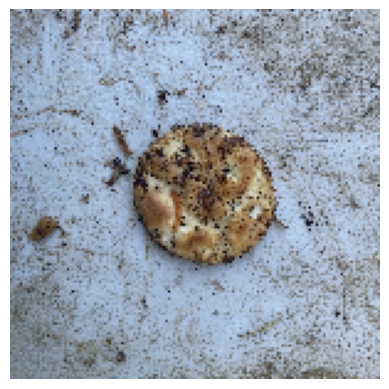

In [13]:
# Load one batch of images and labels
X_batch, y_batch = next(train_dataset)

# Display the first image from the batch
print(y_batch[0])
print(X_batch[0])

plt.imshow(X_batch[0])
plt.axis('off')
plt.show()

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=9, activation='softmax')
])

c:\Projects\python\Pattern Assignment 3\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
learning_rate = 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)

c:\Projects\python\Pattern Assignment 3\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.1349 - loss: 117987.6641 - val_accuracy: 0.1171 - val_loss: 121.3108
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1053 - loss: 2.3778

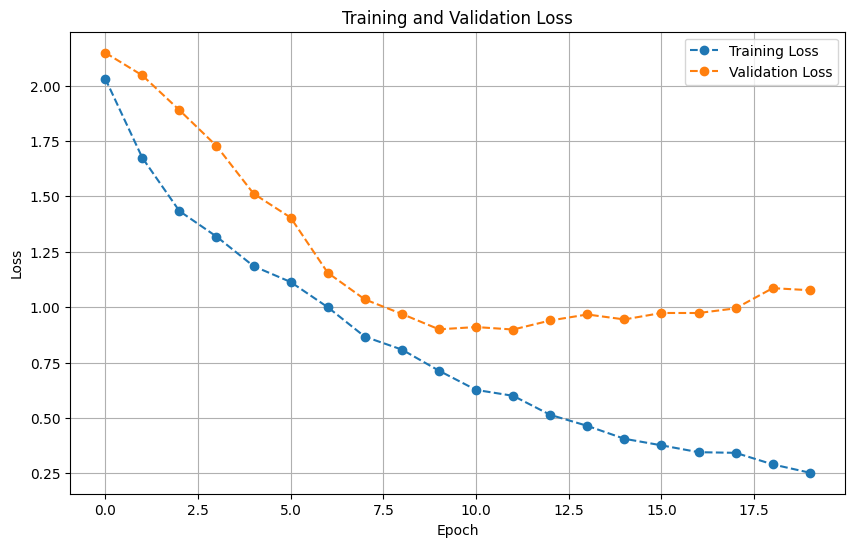

In [ ]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(model_fit.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(model_fit.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Set up test data generator
test = ImageDataGenerator(rescale=1/255)

# Adjust the path to your test dataset folder
test_dataset = test.flow_from_directory(
    base_dir + "/test",       # Adjust this path to your test directory
    target_size=(150, 150),   # Match the input size of your model
    batch_size=32,            # Same as train/validation batch size or adjust as needed
    class_mode='sparse'  # Assumes you have sparse labels
)

# Step 2: Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Found 837 images belonging to 9 classes.
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 441ms/step - accuracy: 0.6964 - loss: 1.1776
Test Accuracy: 0.7109
Test Loss: 1.0794


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step


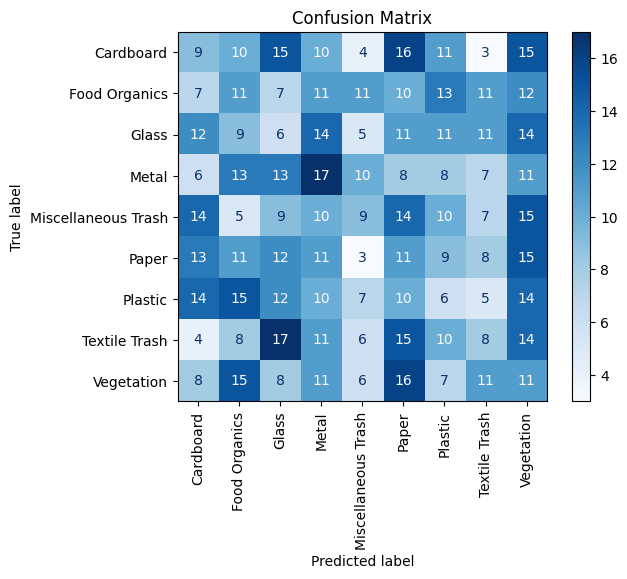

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Generate predictions
test_dataset.reset()  # Reset the generator to start from the first batch
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 2: Get true labels
y_true = test_dataset.classes  # Actual labels from the dataset

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Display confusion matrix
labels = list(test_dataset.class_indices.keys())  # Class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()


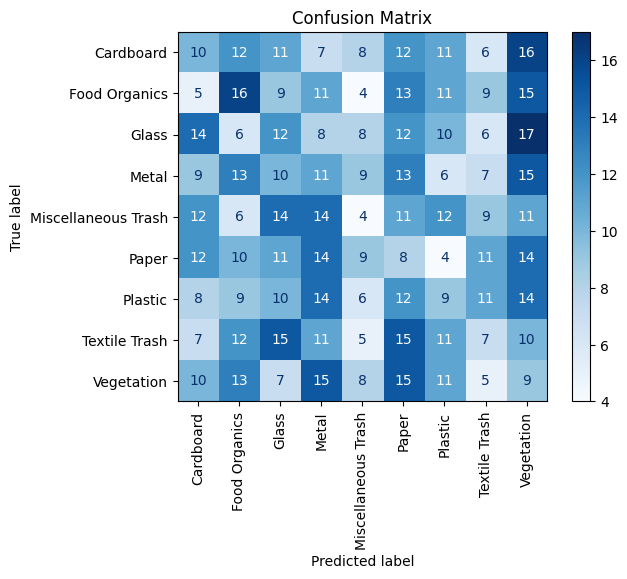

In [ ]:
lst = np.array([])

for i in range(len(test_dataset)):
    lst = np.concatenate((lst, test_dataset[i][1]))

# print(lst)
# print(y_pred_classes)



# Step 3: Compute confusion matrix
cm = confusion_matrix(lst, y_pred_classes)

# Step 4: Display confusion matrix
labels = list(test_dataset.class_indices.keys())  # Class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()